In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [50]:
# Load dataset

df = pd.read_csv('../data/all_MOFs_screening_data.csv')
df.head(5)

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],...,void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2,topology
0,str_m5_o16_o16_sra_sym.77,5.955197,0.117622,9.223227,0.546586,5.955127,0.840043,0.295803,7.972884,5.106942,...,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16,sra
1,str_m5_o16_o16_sra_sym.37,5.715251,0.034598,8.391884,0.149962,5.715251,0.901656,0.283054,8.343676,4.785696,...,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16,sra
2,str_m5_o13_o18_sra_sym.149,5.524486,0.155094,8.674098,0.753841,5.524486,0.688965,0.191963,7.546794,3.803472,...,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18,sra
3,str_m5_o2_o18_sra_sym.4,5.517258,0.084320,10.791553,0.514052,5.517258,1.881691,0.166854,9.246778,1.511943,...,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18,sra
4,str_m5_o16_o16_sra_sym.31,5.451593,0.051989,8.711414,0.260774,5.451476,0.797098,0.254966,8.247735,4.814885,...,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16,sra


In [51]:
df.columns.shape[0]

42

In [52]:
# Drop columns that start with "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Drop metadata columns
metadata_columns = [
    "topology",
]

df = df.drop(columns=metadata_columns)

# Display the first 5 rows of the modified DataFrame
df.head(5)

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],...,surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2
0,str_m5_o16_o16_sra_sym.77,5.955197,0.117622,9.223227,0.546586,5.955127,0.840043,0.295803,7.972884,5.106942,...,613.30,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16
1,str_m5_o16_o16_sra_sym.37,5.715251,0.034598,8.391884,0.149962,5.715251,0.901656,0.283054,8.343676,4.785696,...,0.00,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16
2,str_m5_o13_o18_sra_sym.149,5.524486,0.155094,8.674098,0.753841,5.524486,0.688965,0.191963,7.546794,3.803472,...,0.00,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18
3,str_m5_o2_o18_sra_sym.4,5.517258,0.084320,10.791553,0.514052,5.517258,1.881691,0.166854,9.246778,1.511943,...,0.00,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18
4,str_m5_o16_o16_sra_sym.31,5.451593,0.051989,8.711414,0.260774,5.451476,0.797098,0.254966,8.247735,4.814885,...,1347.04,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16


In [53]:
# Drop all labels except "CO2_uptake_P0.15bar_T298K [mmol/g]"
df = df.drop(columns=df.columns[2:28])
df.head(5)

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2
0,str_m5_o16_o16_sra_sym.77,5.955197,109.786792,2473.186302,1493.01184,613.30,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16
1,str_m5_o16_o16_sra_sym.37,5.715251,126.719639,2419.885159,1444.79680,0.00,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16
2,str_m5_o13_o18_sra_sym.149,5.524486,141.713366,2514.627698,1504.68312,0.00,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18
3,str_m5_o2_o18_sra_sym.4,5.517258,274.702092,2128.612920,1424.81024,0.00,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18
4,str_m5_o16_o16_sra_sym.31,5.451593,101.853896,2415.251225,1436.90552,1347.04,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16


In [54]:
df

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2
0,str_m5_o16_o16_sra_sym.77,5.955197,109.786792,2473.186302,1493.011840,613.30,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16
1,str_m5_o16_o16_sra_sym.37,5.715251,126.719639,2419.885159,1444.796800,0.00,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16
2,str_m5_o13_o18_sra_sym.149,5.524486,141.713366,2514.627698,1504.683120,0.00,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18
3,str_m5_o2_o18_sra_sym.4,5.517258,274.702092,2128.612920,1424.810240,0.00,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18
4,str_m5_o16_o16_sra_sym.31,5.451593,101.853896,2415.251225,1436.905520,1347.04,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324421,str_m2_o10_o18_pcu_sym.111,0.000000,0.000000,949.067112,753.787520,0.00,0.00000,0.0000,3.15041,1.39118,2.95451,Pr,2,10,18
324422,str_m3_o12_o24_pcu_sym.98,0.000000,0.000000,1202.182553,1042.538240,0.00,0.00000,0.0000,3.20407,1.78334,3.17435,Ph-Cl,3,12,24
324423,str_m3_o4_o24_pcu_sym.193,0.000000,24.131770,1188.302573,1001.700216,0.00,0.00000,0.0000,3.36153,1.71487,3.36153,Pr-F,3,4,24
324424,str_m6_o42_o46_etb_sym.74,0.000000,6.071818,1506.660363,1493.296496,0.00,0.01108,0.0000,3.72847,1.97519,3.11676,SO3H,10,42,46


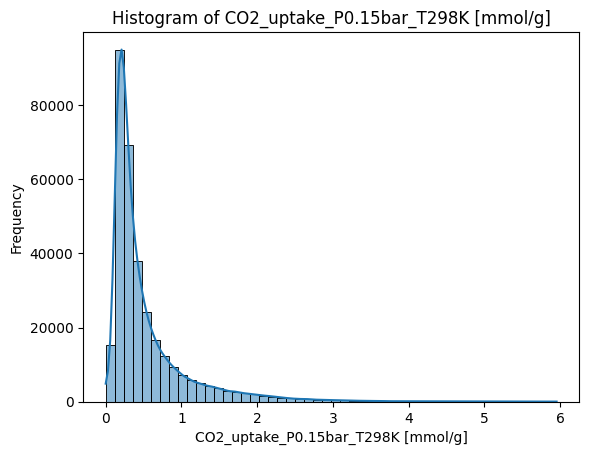

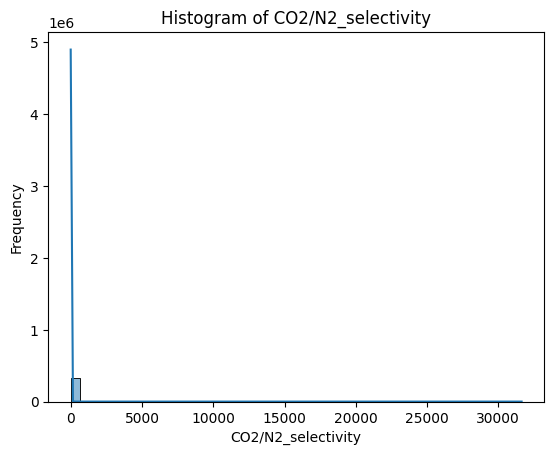

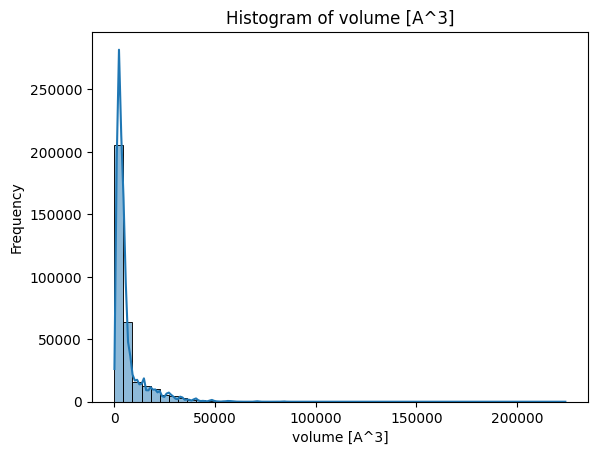

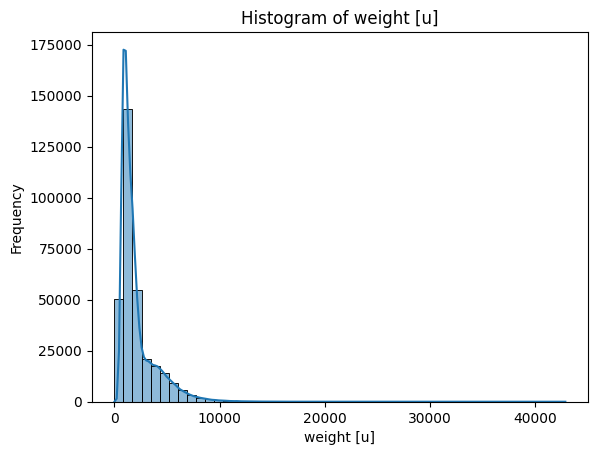

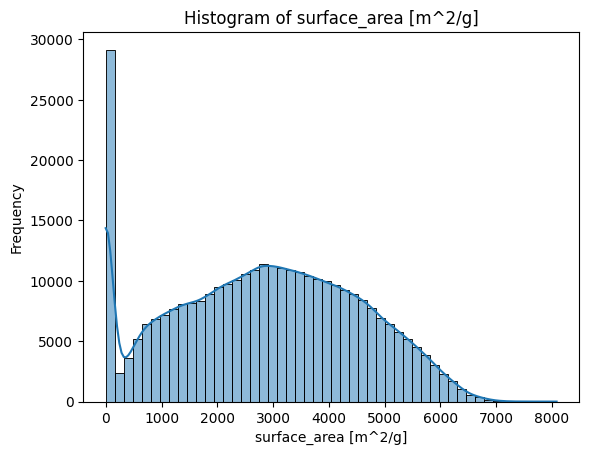

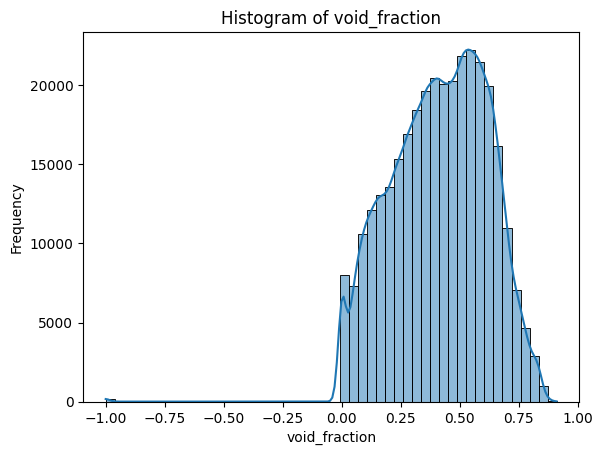

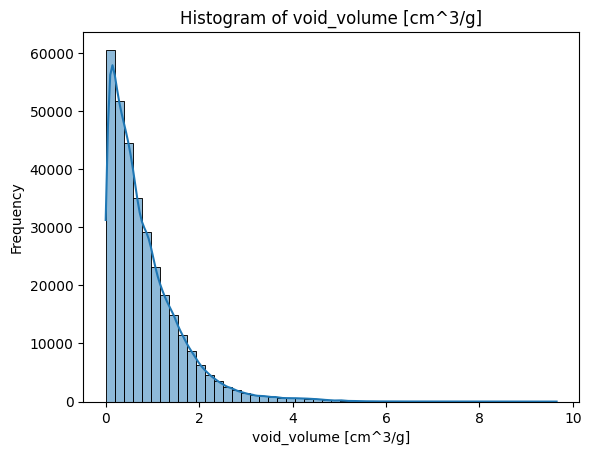

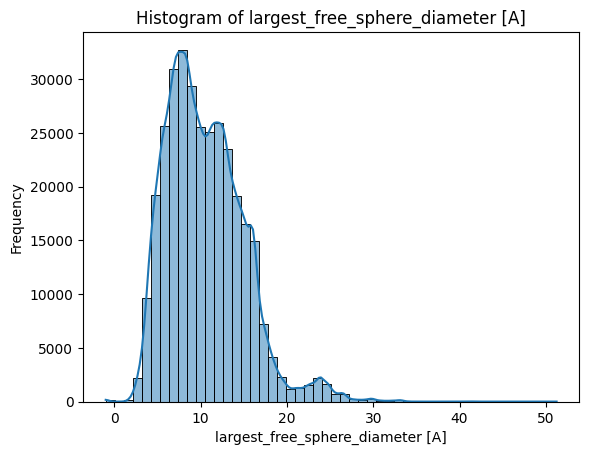

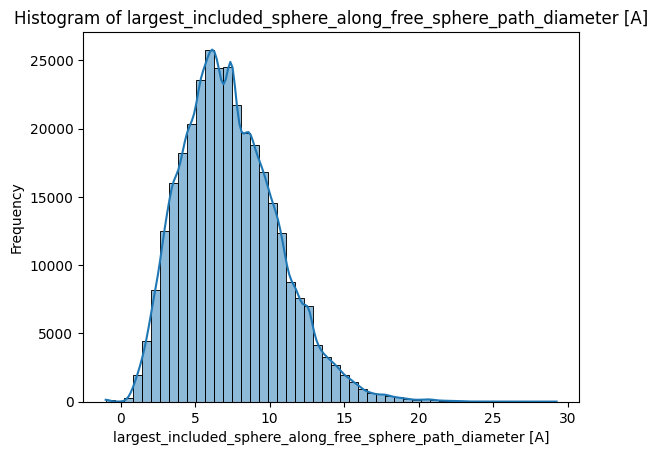

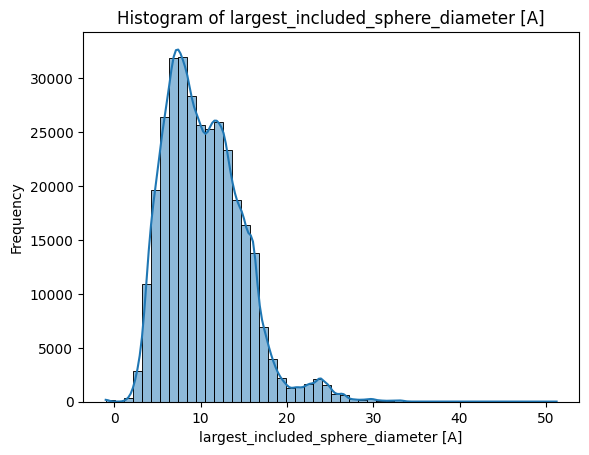

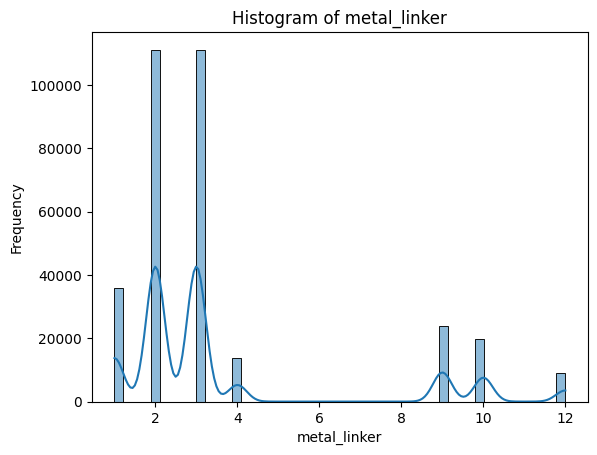

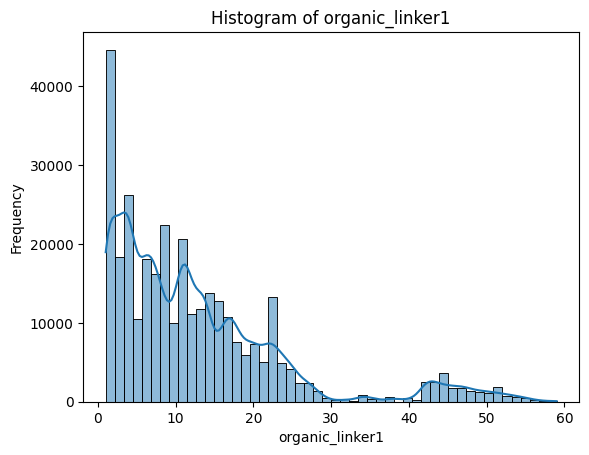

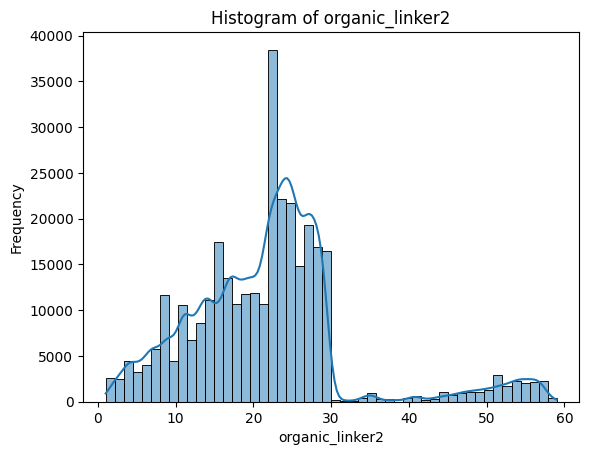

In [55]:
# Generate and display the histogram for the specified column
# Identify numerical columns

# Specify the column to be log-transformed
#column_to_transform = 'CO2_uptake_P0.15bar_T298K [mmol/g]'

# Apply log transformation to the specified column
#df[column_to_transform] = np.log1p(df[column_to_transform])

numerical_columns = df.select_dtypes(include=['number']).columns

# Generate and display a histogram for each numerical column using Seaborn
for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

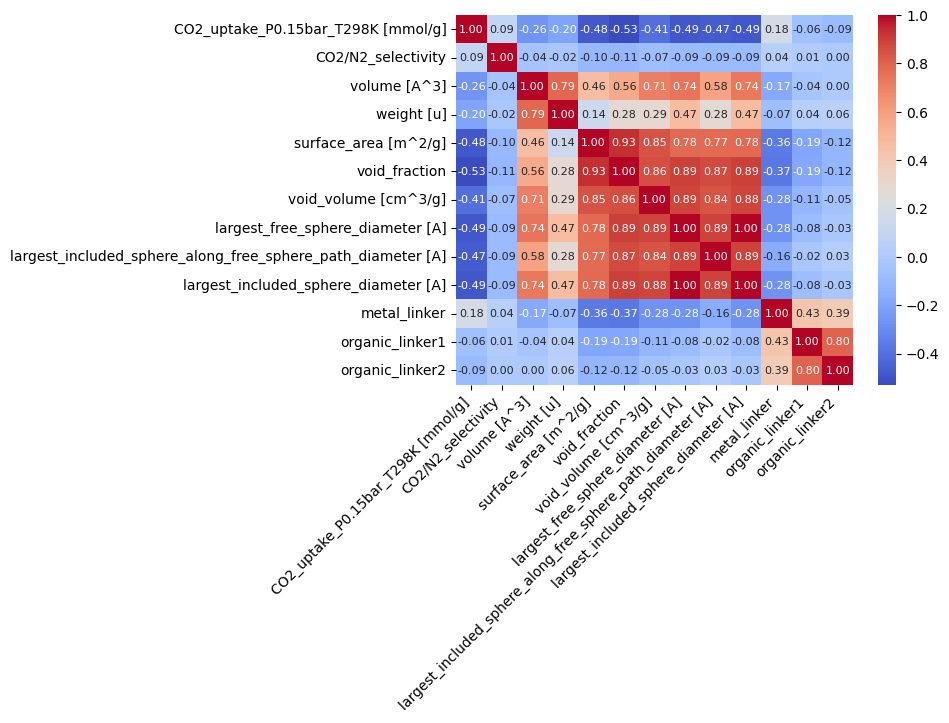

In [56]:
# Create a pairplot of the numerical columns
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
# Rotate the x and y axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

CO2 uptake has promising corr with most of the features.

What are
- metal_linker
- organic_linker1
- organic_linker2
- functional_groups

organic_linker1 and 2 have near zero corr with the target. Probably droppable.

CO2/N2 has barely any correlation with the features. Is it predictable?


Drop columns with high correlation


In [57]:
df = df.drop(["organic_linker1", 
              "organic_linker2", 
              "CO2/N2_selectivity", 
              "functional_groups", 
              "largest_included_sphere_along_free_sphere_path_diameter [A]"], axis=1)

In [58]:
# Analyze missing values

df.replace([" ", ""], np.nan, inplace=True)
nans =  df.isna().mean()
print(nans)
print()

zeros = (df == 0).mean()
print(zeros)


 MOFname                                0.0
CO2_uptake_P0.15bar_T298K [mmol/g]      0.0
volume [A^3]                            0.0
weight [u]                              0.0
surface_area [m^2/g]                    0.0
void_fraction                           0.0
void_volume [cm^3/g]                    0.0
largest_free_sphere_diameter [A]        0.0
largest_included_sphere_diameter [A]    0.0
metal_linker                            0.0
dtype: float64

 MOFname                                0.000000
CO2_uptake_P0.15bar_T298K [mmol/g]      0.005860
volume [A^3]                            0.000000
weight [u]                              0.000000
surface_area [m^2/g]                    0.087934
void_fraction                           0.016706
void_volume [cm^3/g]                    0.019934
largest_free_sphere_diameter [A]        0.000000
largest_included_sphere_diameter [A]    0.000000
metal_linker                            0.000000
dtype: float64


There are MOFs with 0 in surface area. Should these be dropped? What does this mean?

Otherwise no problem with NaN values.

In [61]:
df.to_csv('../data/processed_MOFs.csv', index=False)